# $\S$ 4.2. Linear Regression of an Indicator Matrix

Here each of the response categories are coded via an indicator variable. Thus if $\mathcal{G}$ has $K$ classes, there will be $K$ such indicators $Y_k$, $k=1,\cdots,K$, with

\begin{equation}
Y_k = 1 \text{ if } G = k \text{ else } 0.
\end{equation}

These are collected together in a vector $Y=(Y_1,\cdots,Y_k)$, and the $N$ training instances of these form an $N\times K$ *indicator response matrix* $\mathbf{Y}$, which is a matrix of $0$'s and $1$'s, with each row having a single $1$.

We fit a linear regression model to each of the columns of $\mathbf{Y}$ simultaneously, and the fit is given by

\begin{equation}
\hat{\mathbf{Y}} = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y} = \mathbf{X}\hat{\mathbf{B}}.
\end{equation}

Note that we have a coefficient vector for each response columns $\mathbf{y}_k$, and hence a $(p+1)\times K$ coefficient matrix $\hat{\mathbf{B}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}$. Here $\mathbf{X}$ is the model matrix with $p+1$ columns with a leading columns of $1$'s for the intercept.

A new observation with input $x$ is classified as follows:
* Compute the fitted output $\hat{f}(x)^T = (1, x^T)^T\hat{\mathbf{B}}$, a $K$ vector.
* Identify the largest component and classify accordingly:  

\begin{equation}
\hat{G}(x) = \arg\max_{k\in\mathcal{G}} \hat{f}_k(x).
\end{equation}

### Rationale

One rather formal justification is to view the regression as an estimate of conditional expectation. For the random variable $Y_k$, 

\begin{equation}
\text{E}(Y_k|X=x) = \text{Pr}(G=k|X=x),
\end{equation}

so conditional expectation of each $Y_k$ seems a sensible goal.

The real issue is: How good an approximation to conditional expectation is the rather rigid linear regression model? Alternatively, are the $\hat{f}_k(x)$ reasonable estimates of the posterior probabilities $\text{Pr}(G=k|X=x)$, and more importantly, does this matter?

It is quite straightforward to verify that, as long as the model has an intercept,

\begin{equation}
\sum_{k\in\mathcal{G}}\hat{f}_k(x) = 1.
\end{equation}

However it is possible that $\hat{f}_k(x) < 0$ or $\hat{f}_k(x) > 1$, and typically some are. This is a consequence of the rigid nature of linear regression, especially if we make predictions outside the hull of the training data. These violations in themselves do not guarantee that this approach will not work, and in fact on many problems it gives similar results to more standard linear methods for classification.

If we allow linear regression onto basis expansions $h(X)$ of the inputs, this approach can lead to consistent estimates of the probabilities. As the size of the training set $N$ grows bigger, we adaptively include more basis elements so that linear regression onto these basis functions approaches conditional expectation. We discuss such approaches in Chapter 5.

### A more simplistic viewpoint

Denote $t_k$ as the $k$th column of $\mathbf{I}_K$, the $K\times K$ identity matrix, then a more simplistic viewpoint is to construct *targets* $t_k$ for each class. The response vector ($i$th row of $\mathbf{Y}$)

\begin{equation}
y_i = t_k \text{ if } g_i = k.
\end{equation}

We might then fit the linear model by least squares: The criterion is a sum-of-squared Euclidean distances of the fitted vectors from their targets.

\begin{equation}
\min_{\mathbf{B}} \sum_{i=1}^N \left\| y_i - \left[ (1,x_i^T)\mathbf{B} \right]^T \right\|^2.
\end{equation}

Then a new observation is classified by computing its fitted vector $\hat{f}(x)$ and classifying to the closest target:

\begin{equation}
\hat{G}(x) = \arg\max_k \left\| \hat{f}(x)-t_k \right\|^2.
\end{equation}

This is exactly the same as the previous linear regression approach. Below are the reasons:

1. The sum-of-squared-norm criterion is exactly the same with multiple response linear regression, just viewed slightly differently. The component decouple and can be rearranged as a separate linear model for each element because there is nothing in the model that binds the diferent response together.

2. The closest target classification rule is exactly the same as the maximum fitted component criterion.

### Masked class with the regression approach

There is a serious problem with the regression approach when the number of class $K\ge 3$, especially prevalent when $K$ is large. Because of the rigid nature of the regression model, classes can be *masked* by others. FIGURE 4.2 illustrates an extreme situation when $K=3$. The three classes are perfectly separated by linear decision boundaries, yet linear regression misses the middle class completely.

In [1]:
"""FIGURE 4.2. (Left) The data come from three classes in R^2 and are easily
separated by linear decision boundaries. This plot shows the boundaires
found by linear regression of the indicator response variables. The middle
class is completely masked (never dominates).

Instead of drawing the decision boundary, showing the classified data is
enough to illustrate masking phenomenon."""
import scipy
import scipy.linalg
import pandas as pd
import matplotlib.pyplot as plt

# Make the simulation data
size_cluster = 300
mat_cov = scipy.eye(2)
cluster1 = scipy.random.multivariate_normal([-4, -4], mat_cov, size_cluster)
cluster2 = scipy.random.multivariate_normal([0, 0], mat_cov, size_cluster)
cluster3 = scipy.random.multivariate_normal([4, 4], mat_cov, size_cluster)
target1, target2, target3 = scipy.eye(3)
# print(target1, target2, target3, type(target1))
mat_x0 = scipy.concatenate((cluster1, cluster2, cluster3))
mat_x = scipy.hstack((scipy.ones((size_cluster*3, 1)), mat_x0))
mat_y = scipy.vstack((scipy.tile(target1, (size_cluster, 1)),
                      scipy.tile(target2, (size_cluster, 1)),
                      scipy.tile(target3, (size_cluster, 1))))
# print(mat_x, mat_x.shape)
# print(mat_y, mat_y.shape)

# Multiple linear regression
mat_beta = scipy.linalg.solve(mat_x.T @ mat_x, mat_x.T @ mat_y)
mat_y_hat = mat_x @ mat_beta
assert scipy.allclose(mat_y_hat.sum(axis=1), 1)
# print(mat_y_hat)
idx_classified_y = mat_y_hat.argmax(axis=1)
# print(idx_classified_y, idx_classified_y.size)

classified_cluster1 = mat_x0[idx_classified_y == 0]
classified_cluster2 = mat_x0[idx_classified_y == 1]
classified_cluster3 = mat_x0[idx_classified_y == 2]

fig42 = plt.figure(figsize=(10, 5))
ax1 = fig42.add_subplot(1, 2, 1)
ax1.plot(cluster1[:,0], cluster1[:,1], 'o', color='C0', markersize=2)
ax1.plot(cluster2[:,0], cluster2[:,1], 'o', color='C1', markersize=2)
ax1.plot(cluster3[:,0], cluster3[:,1], 'o', color='C2', markersize=2)
ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_title('Real Data')

ax2 = fig42.add_subplot(1, 2, 2)
ax2.plot(classified_cluster1[:,0], classified_cluster1[:,1], 'o', color='C0', markersize=2)
ax2.plot(classified_cluster2[:,0], classified_cluster2[:,1], 'o', color='C1', markersize=2)
ax2.plot(classified_cluster3[:,0], classified_cluster3[:,1], 'o', color='C2', markersize=2)
ax2.set_xlabel('X_1')
ax2.set_ylabel('X_2')
ax2.set_title('Classification using Linear Regression')
plt.show()

[[ 0.77092541  0.28627643 -0.05720184]
 [ 0.60495518  0.45605673 -0.06101191]
 [ 0.93870287  0.09811004 -0.03681291]
 ..., 
 [-0.05536845  0.34772053  0.70764792]
 [-0.05095228  0.24865285  0.80229943]
 [-0.02083004 -0.01986095  1.04069099]]


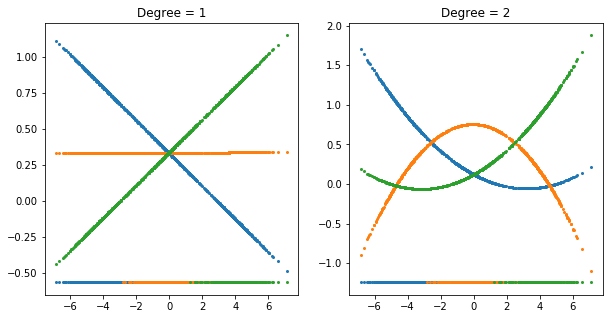

In [2]:
"""FIGURE 4.3. The effects of masking on linear regression in R for a three
class problem.

The rug plot at the base indicates the positions and class membership of
each observation. The three curves in each panel are the fitted regression
to the three-class indicator variables.

We see on the left that the middle class line is horizontal and its fitted
values are never dominant! Thus, observations from class 2 are classified
either as class 1 or 3."""
# Make the simulation data
size_cluster = 300
cluster1 = scipy.random.normal(-4, size=(size_cluster,1))
cluster2 = scipy.random.normal(size=(size_cluster,1))
cluster3 = scipy.random.normal(4, size=(size_cluster,1))
target1, target2, target3 = scipy.eye(3)
# print(target1, target2, target3, type(target1))
mat_x0 = scipy.concatenate((cluster1, cluster2, cluster3))
mat_x = scipy.hstack((scipy.ones((size_cluster*3, 1)), mat_x0))
mat_y = scipy.vstack((scipy.tile(target1, (size_cluster, 1)),
                      scipy.tile(target2, (size_cluster, 1)),
                      scipy.tile(target3, (size_cluster, 1))))
# print(mat_x, mat_x.shape)
# print(mat_y, mat_y.shape)

# Multiple linear regression with degree 1
mat_beta = scipy.linalg.solve(mat_x.T @ mat_x, mat_x.T @ mat_y)
mat_y_hat = mat_x @ mat_beta
idx_classified_y = mat_y_hat.argmax(axis=1)
# print(idx_classified_y, idx_classified_y.size)

# classified_cluster1 = mat_x0[idx_classified_y == 0]
# classified_cluster2 = mat_x0[idx_classified_y == 1]
# classified_cluster3 = mat_x0[idx_classified_y == 2]

fig43 = plt.figure(figsize=(10, 5))
ax1 = fig43.add_subplot(1, 2, 1)
ax1.plot(mat_x0, mat_y_hat[:, 0], 'o', color='C0', markersize=2)
ax1.plot(mat_x0, mat_y_hat[:, 1], 'o', color='C1', markersize=2)
ax1.plot(mat_x0, mat_y_hat[:, 2], 'o', color='C2', markersize=2)
y_floor, _ = ax1.get_ylim()
ax1.plot(cluster1, [y_floor]*size_cluster, 'o', color='C0', markersize=2)
ax1.plot(cluster2, [y_floor]*size_cluster, 'o', color='C1', markersize=2)
ax1.plot(cluster3, [y_floor]*size_cluster, 'o', color='C2', markersize=2)
ax1.set_title('Degree = 1')

# Multiple linear regression with degree 2
mat_x2 = scipy.hstack((mat_x, mat_x0*mat_x0))
mat_beta2 = scipy.linalg.solve(mat_x2.T @ mat_x2, mat_x2.T @ mat_y)
mat_y2_hat = mat_x2 @ mat_beta2
print(mat_y2_hat)

ax2 = fig43.add_subplot(1, 2, 2)
ax2.plot(mat_x0, mat_y2_hat[:, 0], 'o', color='C0', markersize=2)
ax2.plot(mat_x0, mat_y2_hat[:, 1], 'o', color='C1', markersize=2)
ax2.plot(mat_x0, mat_y2_hat[:, 2], 'o', color='C2', markersize=2)
y_floor, _ = ax2.get_ylim()
ax2.plot(cluster1, [y_floor]*size_cluster, 'o', color='C0', markersize=2)
ax2.plot(cluster2, [y_floor]*size_cluster, 'o', color='C1', markersize=2)
ax2.plot(cluster3, [y_floor]*size_cluster, 'o', color='C2', markersize=2)
ax2.set_title('Degree = 2')
plt.show()

For this simple example a quadratic rather than linear fit would solve the problem. However, if there were 4 classes, a quadratic would not come down fast enough, and a cubic would be needed as well. A loose but general rule is that if $K\ge 3$ classes are lined up, polynomial terms up to degree $K-1$ might be needed to resolve them.

Note also that these are polynomials along the derived direction passing through the centroids, which can have orbitrary orientation. So in $p$-dimensional input space, one would need general polynomial terms and cross-products of total degree $K-1$, $O(p^{K-1})$ terms in all, to resolve such worst-case scenarios.

The example is extreme, but for large $K$ and small $p$ such maskings natrually occur. As a more realistic illustration, FIGURE 4.4 is a projection of the training data for a vowel recognition problem onto an informative two-dimensional subspace.

In [3]:
"""FIGURE 4.4. A two-dimensional plot of the vowel training data.

There are K=11 classes in p=10 dimensions, and this is the best view in
terms of a LDA model (Section 4.3.3). The heavy circles are the projected
mean vectors for each class. The class overlap is considerable.

This is a difficult classficiation problem, and the best methods achieve
around 40% errors on the test data. The main point here is summarized in
Table 4.1; masking has hurt in this case.

Even though the textbook may used the first 2 principal components, here
simply the first 2 coordinates x.1 and x.2 are used."""
vowel_df = pd.read_csv('../data/vowel/vowel.train', index_col=0)
df_y = vowel_df['y']
df_x2d = vowel_df[['x.1', 'x.2']]
df_x2d.describe()
vowel_df.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


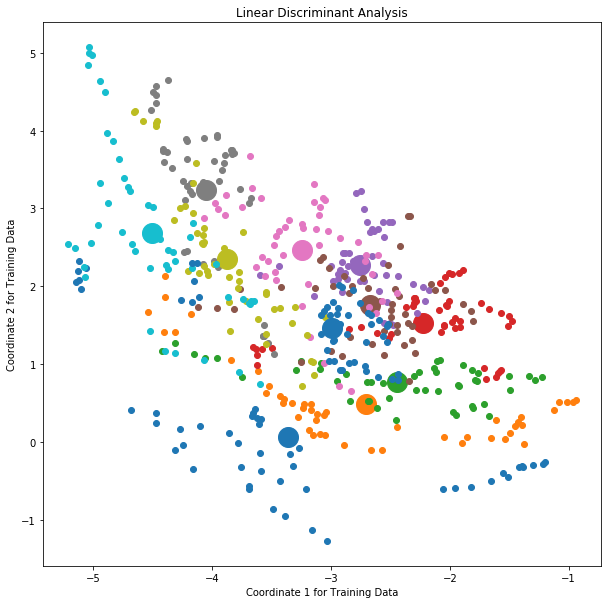

In [4]:
# print(df_2d.head())
grouped = df_x2d.groupby(df_y)

fig44 = plt.figure(figsize=(10, 10))
ax = fig44.add_subplot(1, 1, 1)

# colors = scipy.linspace(0, 1, len(grouped))
for y, x in grouped:
    x_mean = x.mean()
    color = next(ax._get_lines.prop_cycler)['color']
    ax.plot(x['x.1'], x['x.2'], 'o', color=color)
    ax.plot(x_mean[0], x_mean[1], 'o', color=color, markersize=20)
ax.set_xlabel('Coordinate 1 for Training Data')
ax.set_ylabel('Coordinate 2 for Training Data')
ax.set_title('Linear Discriminant Analysis')
plt.show()